<a href="https://colab.research.google.com/github/Webmubees/Bird-identification-fastai/blob/main/Bird_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install fastbook


In [9]:
from fastbook import *

In [10]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1, 'https://hdqwalls.com/download/colorful-parrot-bird-2560x1440.jpg')

In [11]:
dest = Path('bird.jpg')
if not dest.exists():download_url(urls[0], dest, show_progress=False)

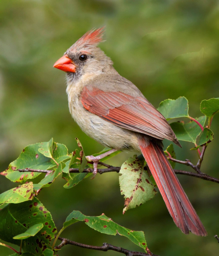

In [12]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [13]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  parent = (path)
  parent.mkdir(exist_ok=True)
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

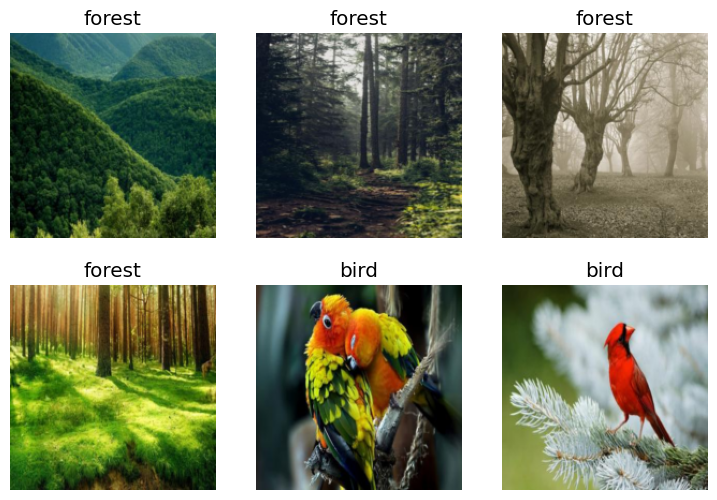

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.666411,0.288766,0.152778,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.046369,0.023429,0.013889,01:05
1,0.024064,0.002415,0.000000,01:10
2,0.016197,0.000649,0.000000,01:03


In [17]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a : {is_bird}.")
print(f"Probablitiy it's a bird: {probs[0]:4f}")

This is a : bird.
Probablitiy it's a bird: 0.999999
